In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def summation(inputs, weights, bias):
    '''sum = 0
    for i in range(0, len(inputs)-1):
        sum += imputs[i] + weights[i];

    return sum + bias'''
    return np.dot(input, weights) + bias

In [4]:
def stepFunction(x):
    return 1 if x > 0 else 0

In [5]:
def bipolarStepFunction(x):
    return 1 if x >= 0 else -1

In [7]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [8]:
def tanh(x):
    return math.tanh(x)

In [11]:
def ReLu(x):
    return max(0, x)

In [12]:
def LeakyReLu(x, alpha):
    return x if x >= 0 else alpha * x

In [13]:
def mean_squared_error(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Length of y_true and y_pred must be the same.")
    
    error = sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred))
    return error / len(y_true)

In [14]:
class Perceptron:
    def __init__(self, weights, learning_rate=0.05):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        self.epochs = 0
        self.errors = []

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def forward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.step_function(weighted_sum)

    def train(self, training_inputs, labels, max_epochs=100):
        num_samples = len(training_inputs)
        for epoch in range(max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.forward(inputs)
                error = label - prediction
                total_error += error ** 2
                self.weights[0] += self.learning_rate * error  # Update bias
                self.weights[1:] += self.learning_rate * error * np.array(inputs)  # Update weights
            self.errors.append(total_error)
            self.epochs += 1
            if total_error == 0:
                break

    def plot_errors(self):
        plt.plot(range(self.epochs), self.errors, marker='o')
        plt.xlabel('Epoch')
        plt.ylabel('Sum-Square Error')
        plt.title('Error vs Epochs')
        plt.show()

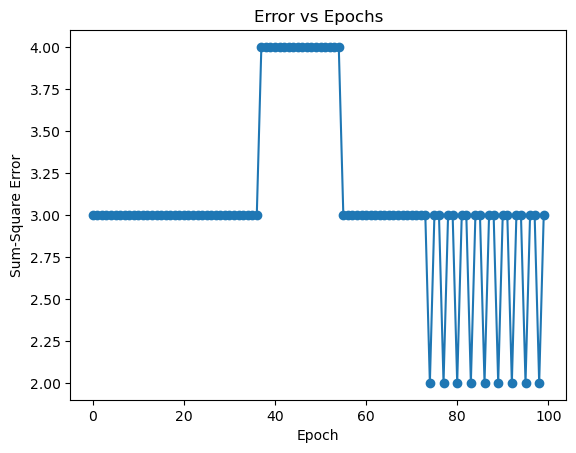

Final weights: [ 0.85 -0.75 -0.8 ]
Number of epochs: 100


In [18]:
initial_weights = [10, 0.2, -0.75]
learning_rate = 0.05

perceptron = Perceptron(weights=initial_weights, learning_rate=learning_rate)

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

perceptron.train(training_inputs, labels)

perceptron.plot_errors()

print(f"Final weights: {perceptron.weights}")
print(f"Number of epochs: {perceptron.epochs}")